In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image

from dataset_utils import load_dataset

In [2]:
dataset = "mimic-cxr"
df, label_names = load_dataset(dataset)
# the most important columns: [img_path, caption, labels]

In [32]:
lens = df["labels"].apply(lambda x: len(x))

In [67]:
df.columns

Index(['subject_id', 'study_id', 'img_id', 'img_path', 'raw_caption',
       'caption', 'split', 'labels'],
      dtype='object')

In [71]:
import numpy as np

max_len = 2000


for i in range(len(df)):
    text = df["caption"][i][-max_len:]  # delete first instead of last characters as the last sentences usually contain the finding
    # pad
    padded_text = text + (" " * (max_len - len(text)))
    padded_text = np.frombuffer(padded_text.encode('ascii', errors="ignore"), dtype='uint8')
    assert len(padded_text) == 2000, (len(text), len(padded_text), text, padded_text)

AssertionError: (410, 1999, 'INDICATION: man with History of right pleurodesis with apical blebectomy for spontaneous pneumothorax ×2, _ now with upper respiratory congestion associated with left mid axillary discomfort // Please evaluate for evidence of left pneumothorax, pneumonia IMPRESSION: Heart size is normal. Postsurgical changes of the right hemithorax are stable. Lungs are clear. No pleural effusion or pneumothorax is present.', array([73, 78, 68, ..., 32, 32, 32], dtype=uint8))

In [78]:
text.encode("ascii", errors="replace").replace(b"?", b" ")

b'INDICATION: man with History of right pleurodesis with apical blebectomy for spontaneous pneumothorax  2, _ now with upper respiratory congestion associated with left mid axillary discomfort // Please evaluate for evidence of left pneumothorax, pneumonia IMPRESSION: Heart size is normal. Postsurgical changes of the right hemithorax are stable. Lungs are clear. No pleural effusion or pneumothorax is present.'

In [73]:
help(text.encode)

Help on built-in function encode:

encode(encoding='utf-8', errors='strict') method of builtins.str instance
    Encode the string using the codec registered for encoding.
    
    encoding
      The encoding in which to encode the string.
    errors
      The error handling scheme to use for encoding errors.
      The default is 'strict' meaning that encoding errors raise a
      UnicodeEncodeError.  Other possible values are 'ignore', 'replace' and
      'xmlcharrefreplace' as well as any other name registered with
      codecs.register_error that can handle UnicodeEncodeErrors.



In [77]:
codecs

AttributeError: type object 'str' has no attribute 'codecs'

In [34]:
lens.describe()

count    377095.0
mean         14.0
std           0.0
min          14.0
25%          14.0
50%          14.0
75%          14.0
max          14.0
Name: labels, dtype: float64

<AxesSubplot:>

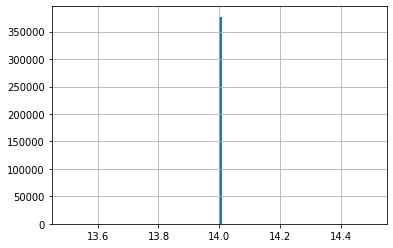

In [33]:
lens.hist(bins=100)

In [31]:
df["caption"][lens < 100].iloc[-5]

'CHEST HISTORY: Lymphoma, NG tube placement. FINDINGS: The NG tube is in the fundus of the stomach.'

In [5]:
#import clip

In [6]:
labels_per_img = df["labels"].apply(lambda x: sum(x == 1))

Text(0.5, 1.0, 'Overall count of True labels per image')

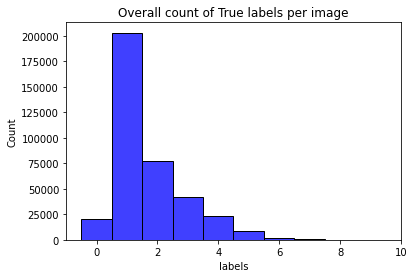

In [7]:
sns.histplot(labels_per_img, color="blue", discrete=True)
plt.title("Overall count of True labels per image")

In [8]:
# num available labels per img

In [9]:
# num images per label

In [18]:
df.shape

(377095, 8)

(256, 270)
[(nan, 'Atelectasis'), (nan, 'Cardiomegaly'), (nan, 'Consolidation'), (nan, 'Edema'), (nan, 'Enlarged Cardiomediastinum'), (nan, 'Fracture'), (nan, 'Lung Lesion'), (-1.0, 'Lung Opacity'), (nan, 'No Finding'), (nan, 'Pleural Effusion'), (nan, 'Pleural Other'), (nan, 'Pneumonia'), (nan, 'Pneumothorax'), (nan, 'Support Devices')]


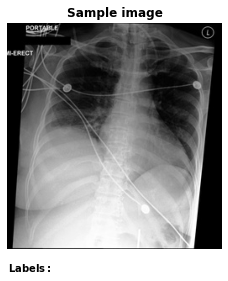

INDICATION: woman with hx of SLE c/b APLS and cerebritis now with worsening tachypnea. // source of tachypnea FINDINGS: Compared to the prior study there is no significant interval change. There continues to be ill definition of the right hemidiaphragm compatible with volume loss/infiltrate IMPRESSION: Right lower lobe volume loss/infiltrate


In [50]:
# show qualitative data
idx = 58215 + 1 #377095 - 200

path = df["img_path"].iloc[idx]
img = Image.open(path)
print(img.size)
fig = plt.figure()
p = plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Sample image", fontweight="bold")
#cap_text = plt.text(0, img.height + 10, r"$\bf{Caption: }$" + df["caption"].iloc[idx])
labels = df.iloc[idx]["labels"]
print(list(zip(labels, label_names)))
label_text = plt.text(0, img.height + 0.1 * img.height, r"$\bf{Labels: }$" + ", ".join(list(np.array(label_names)[labels == 1])))
plt.tight_layout()
plt.savefig(os.path.join(dataset, f"sample_{idx}.pdf"), dpi=300)
plt.show()
print(df["caption"].iloc[idx])

In [30]:
label_names

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices'], dtype='<U26')

In [64]:
len(df) / 1744 * 58.4 / 60 / 60

3.5076369775739042

In [47]:
# check how long it takes to open img
import random
%timeit Image.open(df["img_path"].iloc[random.randint(0, len(df) - 1)])

80.2 ms ± 38.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
